# Logistic Regression (Heart Dataset) 

Project Goal: To find whether the patient has heart diease or not. To accomplish that:
- Building a Classification Model with Logistic Regression
- Applying Feature Scaling for better performance
- Hyperparameter tuning with GridSearch
- Evaluating model performance with test dataset.

### Import the libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Data

* age
* sex
* chest pain type (4 values)
* resting blood pressure
* serum cholestoral in mg/dl
* fasting blood sugar > 120 mg/dl
* resting electrocardiographic results (values 0,1,2)
* maximum heart rate achieved
* exercise induced angina
* oldpeak = ST depression induced by exercise relative to rest
* the slope of the peak exercise ST segment
* number of major vessels (0-3) colored by flourosopy
* thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
* target:0 for no presence of heart disease, 1 for presence of heart disease

Original Source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease

### Load Dataset ("heart.csv")

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Dataset Info and Descriptives

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

## Select features and response variables

In [8]:
X = df.drop("target", axis = 1)
y = df["target"]

## Split the data in train set and test set

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [11]:
X_train.shape, y_train.shape

((242, 13), (242,))

## Feature Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
scaler = StandardScaler()

In [14]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### Applying Logistic Regression Model with GridSearchCV

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr_model = LogisticRegression(solver='saga')

In [17]:
from sklearn.model_selection import GridSearchCV

In [18]:
parameters = {'penalty':['l1', 'l2', 'elasticnet'],
              'l1_ratio':np.linspace(0,1,10),
              'C':np.logspace(0,10,10)          #smaller values specify stronger regularization
             }

In [19]:
grid_model = GridSearchCV(estimator=lr_model,
                          param_grid=parameters,
                          cv=5,
                          scoring="accuracy", #since response variable is uniformly distrubuted, accuracy could be used as scoring
                          n_jobs=-1)

In [20]:
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='saga'), n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 1.29154967e+01, 1.66810054e+02, 2.15443469e+03,
       2.78255940e+04, 3.59381366e+05, 4.64158883e+06, 5.99484250e+07,
       7.74263683e+08, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

### Best parameters according to GridSearchCV

In [21]:
grid_model.best_params_

{'C': 1.0, 'l1_ratio': 0.0, 'penalty': 'l1'}

### Model Coeffients 

In [22]:
best_model = grid_model.best_estimator_
best_model.coef_

array([[-0.05865001, -0.59852314,  0.8907508 , -0.29228354, -0.21530237,
         0.04162674,  0.15826006,  0.37938698, -0.4565056 , -0.46759925,
         0.40005413, -0.80302779, -0.54380352]])

### Model performance evaluation with test dataset

#### Performance Metrics

* Confusion Matrix Array
* Confusion Matrix Plot
* Classification Report

In [23]:
y_pred = grid_model.predict(scaled_X_test)

In [24]:
from sklearn import metrics

In [25]:
metrics.accuracy_score(y_test, y_pred)

0.8360655737704918

In [26]:
metrics.confusion_matrix(y_test, y_pred)

array([[23,  8],
       [ 2, 28]], dtype=int64)

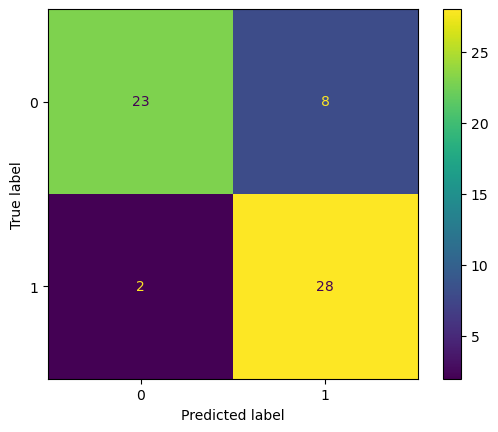

In [27]:
metrics.ConfusionMatrixDisplay.from_estimator(estimator=grid_model,
                                              X=scaled_X_test,
                                              y=y_test);

In [28]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



#### Precision-Recall (PR) Curve & ROC Curve

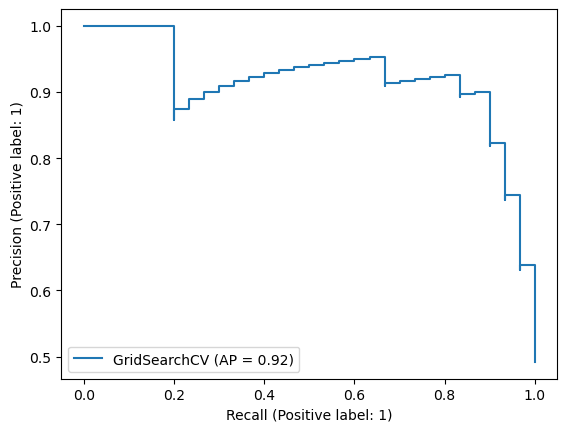

In [29]:
metrics.PrecisionRecallDisplay.from_estimator(grid_model, scaled_X_test, y_test);

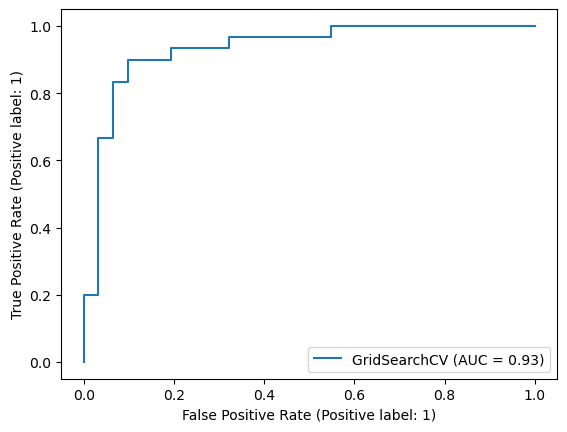

In [30]:
metrics.plot_roc_curve(grid_model, scaled_X_test, y_test);

In [31]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

## Final Model

In [32]:
final_model = LogisticRegression(C = 1.0,
                                 l1_ratio = 0.0,
                                 penalty = 'l1',
                                 solver='saga')

In [33]:
final_model.fit(X,y)

LogisticRegression(l1_ratio=0.0, penalty='l1', solver='saga')

## Prediction

**Patient Features**

    age          48.0
    sex           0.0
    cp            2.0
    trestbps    130.0
    chol        275.0
    fbs           0.0
    restecg       1.0
    thalach     139.0
    exang         0.0
    oldpeak       0.2
    slope         2.0
    ca            0.0
    thal          2.0

In [34]:
X.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [35]:
patient = [[48, 0, 2, 130, 275, 0, 1, 139, 0, 0.2, 2, 0, 2]]

In [36]:
final_model.predict(patient)

array([1], dtype=int64)

In [37]:
final_model.predict_proba(patient)

array([[0.49946016, 0.50053984]])

### Probabilities of patient are nearly equal. Let's try other solvers & hyperparameters.

In [38]:
lr_model2 = LogisticRegression()

In [39]:
parameters2 = {
                'penalty' : ['l1','l2'], 
                'C'       : np.logspace(-3,3,7),
                'solver'  : ['newton-cg', 'lbfgs', 'liblinear', "newton-cholesky", "sag"], 
}

In [40]:
grid_model2 = GridSearchCV(lr_model2,                
                           param_grid = parameters2, 
                           scoring='accuracy',        
                           cv=10)

In [41]:
grid_model2.fit(scaled_X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear',
                                    'newton-cholesky', 'sag']},
             scoring='accuracy')

In [42]:
grid_model2.best_params_

{'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}

In [43]:
best_model2 = grid_model2.best_estimator_
best_model2.coef_

array([[-0.10264114, -0.43181672,  0.65839065, -0.21403543, -0.15360632,
         0.05719471,  0.13805483,  0.32582225, -0.40207676, -0.38238   ,
         0.31866905, -0.5883425 , -0.42339499]])

### Performance

In [44]:
y_pred2 = grid_model2.predict(scaled_X_test)

In [45]:
metrics.accuracy_score(y_test, y_pred2)

0.8360655737704918

In [46]:
metrics.confusion_matrix(y_test, y_pred2)

array([[23,  8],
       [ 2, 28]], dtype=int64)

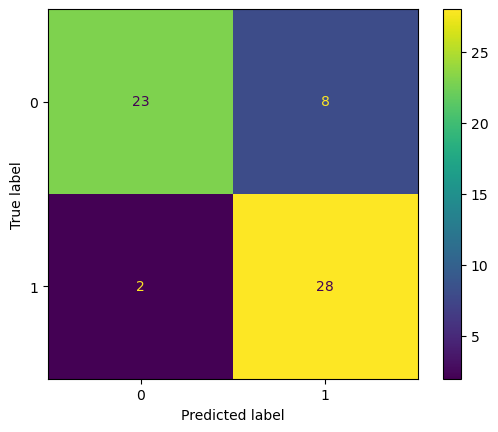

In [47]:
metrics.ConfusionMatrixDisplay.from_estimator(estimator=grid_model2,
                                              X=scaled_X_test,
                                              y=y_test);

In [48]:
print(metrics.classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.92      0.74      0.82        31
           1       0.78      0.93      0.85        30

    accuracy                           0.84        61
   macro avg       0.85      0.84      0.83        61
weighted avg       0.85      0.84      0.83        61



Two results are the same. Lets train full dataset and observe probabilities

### Final Model 2

In [49]:
final_model2 = LogisticRegression(C = 0.1,
                                 penalty = 'l2',
                                 solver='newton-cg')

In [50]:
final_model2.fit(X,y)

LogisticRegression(C=0.1, solver='newton-cg')

In [51]:
final_model2.predict(patient)

array([1], dtype=int64)

In [52]:
final_model2.predict_proba(patient)

array([[0.08745178, 0.91254822]])

### This time, we can say that our response variable is 1. Let s see fulldataset confussionmatrix

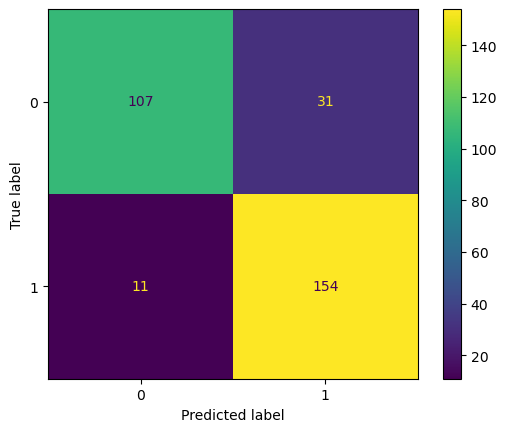

In [53]:
metrics.ConfusionMatrixDisplay.from_estimator(estimator=final_model2,
                                              X=X,
                                              y=y);

In [54]:
metrics.accuracy_score(y_test, y_pred2)

0.8360655737704918